# Задание 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
2. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните, почему отображённые данные лучше всего представимы именно этим типом графика
3. Сохраните датасет
4. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой.
    Например, для набора данных о прямоугольниках с двумя колонками `width` и `height` будет корректно придумать колонку `perimeter` или `area`, равную `width * height`. Некорректно будет придумать колонку `width2`, равную `width * 2`, потому что эта информация не будет нести полезную информацию о фигурах.

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
2. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
3. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
4. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
5. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
6. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
7. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
8. [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

# Решение

*Подготовил*: Подцепко Игорь Сергеевич, учебная группа M3335

В качестве набора данных было принято решение выбрать "GPS Data of Seabirds". Архив загружен и его содержимое распаковано в папку `data/raw`.

## Загрузка датасета и обработка недостающих данных

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rc('font', size=8)

In [3]:
dataset = pd.read_csv('data/raw/anon_gps_tracks_with_dive.csv')
dataset.drop(columns="Unnamed: 0", inplace=True);  # just id
dataset.year = dataset.year.str.replace('t', '').astype(int)
dataset.date_time = pd.to_datetime(dataset.date_time)
dataset['month'] = pd.DatetimeIndex(dataset.date_time).month
dataset['day'] = pd.DatetimeIndex(dataset.date_time).day
dataset.head(5)

,lat,lon,alt,unix,bird,species,year,date_time,max_depth.m,colony2,coverage_ratio,is_dive,is_dive_1m,is_dive_2m,is_dive_4m,is_dive_5m,is_dive_0m,month,day
0,56.095451,-6.233089,-23.059999,1340627854,1,tCOGU,2012,2012-06-25 13:37:34,-2.172046,1,0.5,False,False,False,False,False,False,6,25
1,56.095408,-6.233520,-2.983077,1340627954,1,tCOGU,2012,2012-06-25 13:39:14,-1.152306,1,0.6,False,False,False,False,False,False,6,25
2,56.095437,-6.234275,3.470286,1340628054,1,tCOGU,2012,2012-06-25 13:40:54,-2.172046,1,0.7,False,False,False,False,False,False,6,25
3,56.095635,-6.234815,1.902667,1340628154,1,tCOGU,2012,2012-06-25 13:42:34,-2.172046,1,0.8,False,False,False,False,False,False,6,25
4,56.095821,-6.235293,2.824952,1340628254,1,tCOGU,2012,2012-06-25 13:44:14,-2.172046,1,0.9,False,False,False,False,False,False,6,25


In [4]:
print("Columns with nulls:")
for column in dataset.columns[dataset.isnull().any()]:
    print('-', column)

Columns with nulls:
- coverage_ratio


In [5]:
dataset.drop(columns='coverage_ratio', inplace=True);

## Построение графиков

### Обычный график с типом `bar`

Данный график помогает визуализировать *разницу* между характеристиками, например, можно для каждого года можно подсчитать количество замеров и сравнить годы по этому показателю.

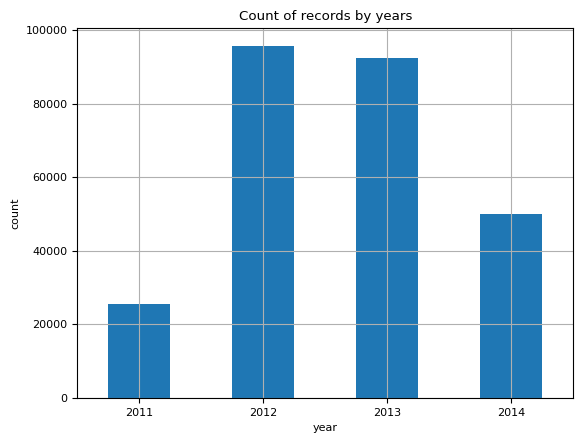

In [6]:
dataset.year.value_counts().sort_index().plot.bar(
    title="Count of records by years", rot=0, grid=True, xlabel='year', ylabel='count'
);

__Вывод__: Больше всего исследований проводилось в 2012 году.

Аналогично можно визуализировать то, насколько различные виды птиц интересовали авторов исследования.

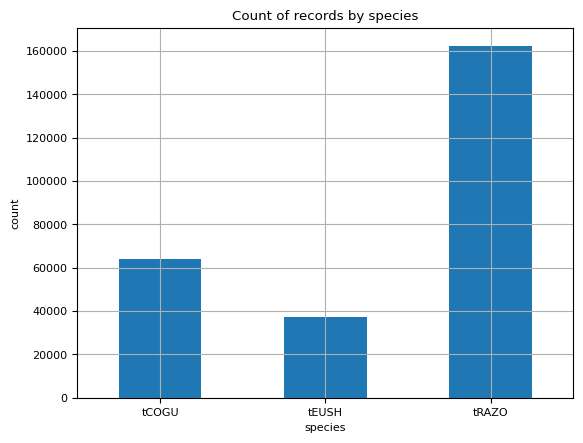

In [7]:
dataset.species.value_counts().sort_index().plot.bar(
    title="Count of records by species", rot=0, grid=True, xlabel='species', ylabel='count'
);

__Вывод__: Меньше всего авторов интересовали Хохлатые бакланы (European shag).

### Рассеяния

Долгота и широта фактически являются координатами, что наводит на мысль о том, что эти данные должны быть хорошо представимы на графике "рассеяния". Фактически такой график должен выглядеть как карта с путями прередвижения птиц и показывать ареал обитания отдельных птиц и целых колоний.

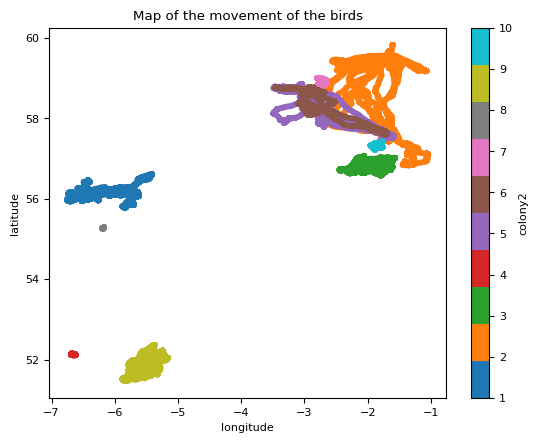

In [8]:
dataset.plot.scatter(
    title="Map of the movement of the birds",
    x='lon', xlabel='longitude',
    y='lat', ylabel='latitude',
    size=10, color='colony2', cmap='tab10'
);

Аналогично можно посмотреть путь какой-нибудь конкретной птицы.

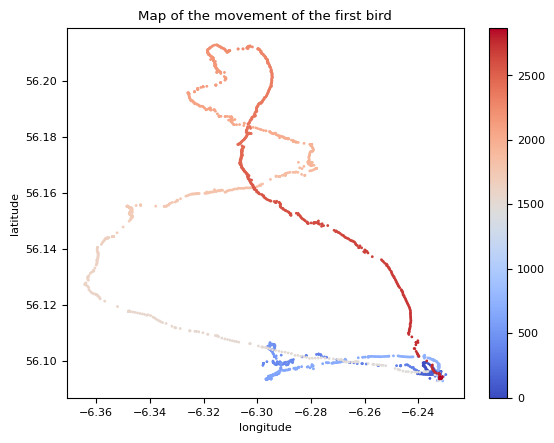

In [9]:
first_bird = dataset.loc[dataset.bird == 1]
first_bird.plot.scatter(
    title="Map of the movement of the first bird",
    x='lon', xlabel='longitude',
    y='lat', ylabel='latitude',
    size=1, color=first_bird.index, cmap='coolwarm'
);

Визуализировать перемещение птицы можно также на 3D рассеянии, так как высота добавляет третью координату.

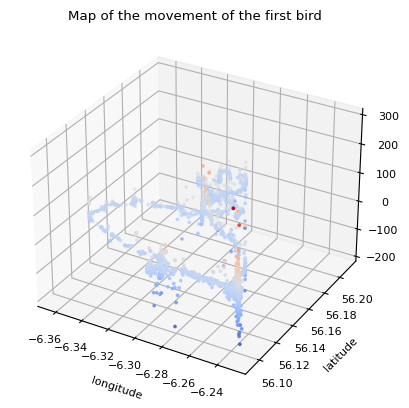

In [10]:
ax = plt.axes(projection='3d')
ax.scatter(first_bird.lon, first_bird.lat, first_bird.alt, c=first_bird.alt, cmap='coolwarm', s=3);
ax.set_title('Map of the movement of the first bird')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('altitude');

### Гистограммы

С помощью гистограммы можно проанализировать, какие значения параметра встречаются чаще всего. Определим высоту, на которой чаще всего находились птицы. Для большей наглядности рассмотрим только высоты из промежутка (-100, 100). Все остальное составляет достаточно малую долю.

In [11]:
alt = dataset.alt
alt = alt[(-100 < alt) & (alt < 100)]
print(f'Selected: {round(len(alt) * 100 / len(dataset))}%')

Selected: 95%


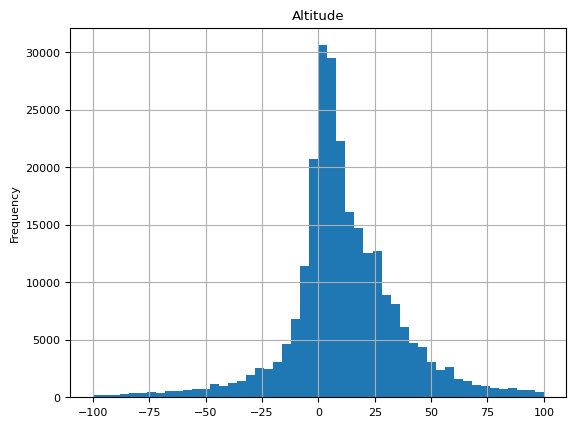

In [12]:
alt.plot.hist(bins=50, title='Altitude', grid=True);

__Вывод__: Гистограмма показывает, что чаще всего птицы находятся на высоте 0 -- 6.

Двумерная гистограмма наглядно указывает на то, в каких участках карты чаще всего находятся птицы.

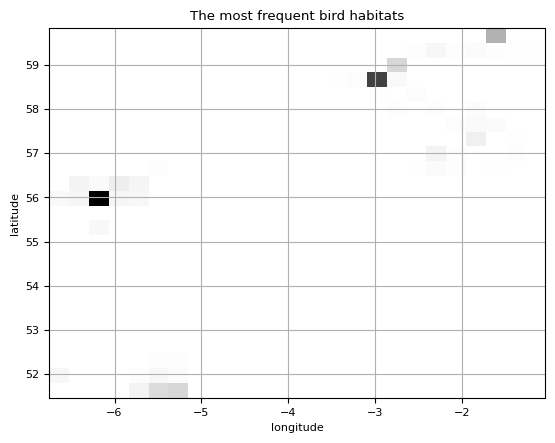

In [13]:
plt.title('The most frequent bird habitats')
plt.hist2d(dataset.lon, dataset.lat, bins=25, cmap='Greys')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid();

### Boxplots

Ящик с усами компактно и наглядно изображает распределение величины и несет в себе большое кол-во информации, такой как медиана, нижний и верхний квартили и прочее. В данном случае он может помочь оценить, на какую глубину чаще всего ныряют птицы.

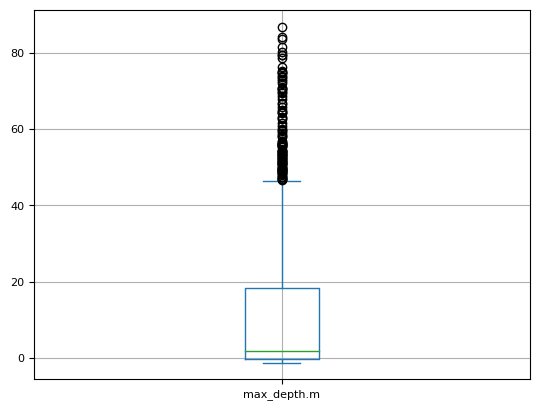

In [14]:
dataset[dataset.bird == 15]['max_depth.m'].plot.box(grid=True);

__Вывод__: Птица с идентификатором равным 15 редко ныряет глубже 45 метров. Примерно в половине случаев на глубину всего 3 -- 4 метров.

## Сохранение датасета

In [15]:
dataset.to_csv('data/processed/anon_gps_tracks_with_dive.csv')

## Добавление новой колонки

Добавим колонку типа `bool`, в которой будет содержаться информация о том, находится ли птица в периоде гнездования. `tRAZO` (Гагарка) гнездуется с конца мая по начало июня, `tCOGU` (Тонкоклювая кайра) -- c конца мая по начало июля, `tEUSH` (Хохлатый баклаан) -- с середины мая по начало июня.

In [16]:
s = dataset.species
m = dataset.month
d = dataset.day
dataset['nests'] = ((s == 'tRAZO') & (
                        ((m == 5) & (d > 25)) | ((m == 6) & (d < 5)))
                    ) | ((s == 'tCOGU') & (
                        ((m == 5) & (d > 25)) | (m == 6) | ((m == 7) & (d < 5)))
                    ) | ((s == 'tEUSH') & (
                        ((m == 5) & (d > 15)) | ((m == 6) & (d < 10))))
del s, m, d